In [460]:
import os
os. getcwd()
os.listdir()
os.path.exists('INTELLOG.TXT')

True

In [461]:
#import the dataset
import pandas as pd
import numpy as np

col_names= ['SitID', 'Depth','LithID', 'W_Tar', 'SW', 'VSH', 'PHI', 'RW']
dataset = pd.read_csv('INTELLOG.TXT',delimiter="\t", names= col_names)

#unique values of each variable
dataset.nunique()

SitID      2175
Depth     57186
LithID        7
W_Tar       505
SW          962
VSH        1001
PHI         437
RW         4925
dtype: int64

In [462]:
dataset.tail()

SitID   Depth  LithID  W_Tar   SW    VSH  PHI        RW
579841  184130  206.00       5    0.0  1.0  0.727  0.0    0.4450
579842  184130  206.25       4    0.0  1.0  0.650  0.0    0.4450
579843  184130  206.50       4    0.0  1.0  0.617  0.0    0.4450
579844  184130  206.75       5    0.0  1.0  0.733  0.0    0.4450
579845  184130  207.00       4    0.0  1.0  0.616  0.0    0.4450

In [463]:
dataset.describe()

SitID          Depth         LithID          W_Tar  \
count  579846.000000  579846.000000  579846.000000  579846.000000   
mean   119191.947886     381.550537       2.998370       0.008972   
std     17010.229729     169.285127       1.618618       0.136901   
min    102496.000000       0.000000       0.000000      -1.167000   
25%    108693.000000     247.940000       1.000000       0.000000   
50%    112994.000000     426.570000       3.000000       0.000000   
75%    122505.000000     494.750000       5.000000       0.036000   
max    184130.000000     960.040000       6.000000       0.184000   

                  SW            VSH            PHI  
count  579846.000000  579846.000000  579846.000000  
mean        0.778169       0.482571       0.170572  
std         0.293630       0.280934       0.104686  
min         0.000000       0.000000       0.000000  
25%         0.554000       0.250000       0.087000  
50%         1.000000       0.488000       0.163000  
75%         1.000000       0.704000       0.255000  
max         1.000000       1.000000       0.471000

In [464]:
# unique wells and shape of the dataset
dataset.SitID.nunique(), dataset.shape

(2175, (579846, 8))

In [465]:
# this is the legend of the lithology
lithology = pd.read_csv('Lithology_dic.TXT',delimiter="\t")
lithology

LithID   Description
0       0     Undefined
1       1          Sand
2       2     ShalySand
3       3    SandyShale
4       4         Shale
5       5          Coal
6       6  CementedSand

In [466]:
dataset['LithID'].value_counts()

1    158516
5    149757
4    135740
2    119512
3     12898
6      1769
0      1654
Name: LithID, dtype: int64

In [467]:
# select the list of wells to work on
import lasio

# View contents of the path, we will see LAS files plus an ASCII file
files = os.listdir('Logs/')

#how many las files do we have?
display(len(files))
files

498

['00-01-01-073-05W5-0.LAS',
 '00-01-01-095-19W4-0.LAS',
 '00-01-03-085-15W4-0.LAS',
 '00-01-04-075-23W4-0.LAS',
 '00-01-05-085-15W4-0.LAS',
 '00-01-08-080-21W4-0.LAS',
 '00-01-09-080-13W4-0.LAS',
 '00-01-10-078-26W4-0.LAS',
 '00-01-11-082-23W4-0.LAS',
 '00-01-12-079-14W4-0.LAS',
 '00-01-21-084-17W4-0.LAS',
 '00-01-24-075-24W4-0.LAS',
 '00-01-25-083-02W4-0.LAS',
 '00-01-26-068-08W4-0.LAS',
 '00-01-27-079-23W4-0.LAS',
 '00-01-27-080-14W4-0.LAS',
 '00-01-28-078-02W4-0.LAS',
 '00-01-29-096-19W4-0.LAS',
 '00-01-32-080-22W4-0.LAS',
 '00-02-01-073-19W4-0.LAS',
 '00-02-01-074-05W5-0.LAS',
 '00-02-02-083-11W4-0.LAS',
 '00-02-03-071-04W5-0.LAS',
 '00-02-05-074-04W5-0.LAS',
 '00-02-05-076-26W4-0.LAS',
 '00-02-06-074-04W5-0.LAS',
 '00-02-07-076-13W4-0.LAS',
 '00-02-08-078-02W5-0.LAS',
 '00-02-14-077-04W4-0.LAS',
 '00-02-15-076-18W4-0.LAS',
 '00-02-17-079-03W4-0.LAS',
 '00-02-18-077-13W4-0.LAS',
 '00-02-22-071-22W4-0.LAS',
 '00-02-22-091-19W4-0.LAS',
 '00-02-25-077-10W4-0.LAS',
 '00-02-26-072-13W4-

In [468]:
# get files based on a condition

las_file_list_5w5 = []

for file in files:
    #choose las files of wells from the same region
    #we have identifier for each region, ex. North>>(T 91-104 ,R 5-21W4)
    #I will pick the west region with 19W4 or 5W5
    if '5W5' in file:
        las_file_list_5w5.append(file)

#remove the well with incomplete data
las_file_list_5w5.remove('00-04-12-072-05W5-0.LAS')
las_file_list_5w5

['00-01-01-073-05W5-0.LAS',
 '00-02-01-074-05W5-0.LAS',
 '00-02-26-073-05W5-0.LAS',
 '00-03-19-081-05W5-0.LAS',
 '00-04-21-074-05W5-0.LAS',
 '00-05-18-071-05W5-0.LAS',
 '00-05-20-070-05W5-0.LAS']

In [469]:
#how the data in the las file looks like
las = lasio.read('Logs/00-01-01-073-05W5-0.LAS')
lasdf = las.df()
lasdf

DPHI   NPHI      GR     CALI     ILD
DEPT                                         
390.00  0.199  0.457  82.478  238.379   2.923
390.25  0.208  0.456  86.413  238.331   2.925
390.50  0.246  0.452  90.229  238.069   2.917
390.75  0.266  0.475  90.944  238.752   2.898
391.00  0.287  0.484  88.866  239.724   2.890
...       ...    ...     ...      ...     ...
649.00  0.007  0.098  41.662  264.141  16.559
649.25  0.017  0.111  46.210  264.697  15.834
649.50  0.023  0.126  51.129  265.467  14.449
649.75  0.028  0.146  58.340  266.024  12.236
650.00  0.036  0.166  64.622  266.581  10.576

[1041 rows x 5 columns]

In [470]:
# get files based on a condition
las_file_list_19W4 = []

for file in files:
    #choose las files of wells from the same region
    #we have identifier for each region, ex. North>>(T 91-104 ,R 5-21W4)
    #I will pick the west region with 19W4 or 5W5
    if '19W4' in file:
        las_file_list_19W4.append(file)

#remove the well with incomplete data
#las_file_list.remove('00-04-12-072-05W5-0.LAS')
las_file_list_19W4

['00-01-01-095-19W4-0.LAS',
 '00-01-29-096-19W4-0.LAS',
 '00-02-01-073-19W4-0.LAS',
 '00-02-22-091-19W4-0.LAS',
 '00-03-18-089-19W4-0.LAS',
 '00-04-02-079-19W4-0.LAS',
 '00-04-07-091-19W4-0.LAS',
 '00-04-36-071-19W4-0.LAS',
 '00-05-24-071-19W4-0.LAS',
 '00-05-29-078-19W4-0.LAS',
 '00-06-02-092-19W4-0.LAS',
 '00-06-03-071-19W4-0.LAS',
 '00-06-22-075-19W4-0.LAS',
 '00-06-23-072-19W4-0.LAS',
 '00-06-26-078-19W4-0.LAS',
 '00-06-28-076-19W4-0.LAS',
 '00-06-31-074-19W4-0.LAS',
 '00-06-31-089-19W4-0.LAS',
 '00-06-35-090-19W4-0.LAS',
 '00-06-35-092-19W4-0.LAS',
 '00-07-01-084-19W4-0.LAS',
 '00-07-14-070-19W4-0.LAS',
 '00-07-18-079-19W4-0.LAS',
 '00-07-19-077-19W4-0.LAS',
 '00-07-19-085-19W4-0.LAS']

In [471]:
#how the data in the las file looks like
las = lasio.read('Logs/00-07-19-085-19W4-0.LAS')
lasdf = las.df()
display(lasdf)
lasdf.info()

#remove las that does not have complete logs
remove_file = ['00-01-29-096-19W4-0.LAS' , '00-06-22-075-19W4-0.LAS' , '00-06-28-076-19W4-0.LAS', '00-07-18-079-19W4-0.LAS', '00-07-19-077-19W4-0.LAS', '00-06-31-074-19W4-0.LAS', '00-02-22-091-19W4-0.LAS']

CALI      GR   DPHI   NPHI     ILD
DEPT                                          
192.024  160.437  50.141  0.239  0.299  13.676
192.274  162.836  58.740  0.262  0.441   7.842
192.524  166.494  63.375  0.301  0.489   5.777
192.774  173.294  76.430  0.237  0.572   4.884
193.024  177.790  93.137  0.230  0.603   3.983
...          ...     ...    ...    ...     ...
346.524  178.315  66.519  0.184  0.530   4.693
346.774  179.248  66.822  0.167  0.521   5.021
347.024  176.720  66.009  0.116  0.468   5.163
347.274  172.201  64.825  0.138  0.428   5.108
347.524  170.720  61.971  0.162  0.442   4.817

[623 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
Float64Index: 623 entries, 192.024 to 347.524
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CALI    623 non-null    float64
 1   GR      623 non-null    float64
 2   DPHI    623 non-null    float64
 3   NPHI    623 non-null    float64
 4   ILD     623 non-null    float64
dtypes: float64(5)
memory usage: 29.2 KB


In [472]:
# using list comprehension to remove the incomplete files
las_file_list_19W4_complete = [i for i in las_file_list_19W4 if i not in remove_file]

las_file_list_19W4_complete

['00-01-01-095-19W4-0.LAS',
 '00-02-01-073-19W4-0.LAS',
 '00-03-18-089-19W4-0.LAS',
 '00-04-02-079-19W4-0.LAS',
 '00-04-07-091-19W4-0.LAS',
 '00-04-36-071-19W4-0.LAS',
 '00-05-24-071-19W4-0.LAS',
 '00-05-29-078-19W4-0.LAS',
 '00-06-02-092-19W4-0.LAS',
 '00-06-03-071-19W4-0.LAS',
 '00-06-23-072-19W4-0.LAS',
 '00-06-26-078-19W4-0.LAS',
 '00-06-31-089-19W4-0.LAS',
 '00-06-35-090-19W4-0.LAS',
 '00-06-35-092-19W4-0.LAS',
 '00-07-01-084-19W4-0.LAS',
 '00-07-14-070-19W4-0.LAS',
 '00-07-19-085-19W4-0.LAS']

In [473]:
# generate dataframes from these las, 
# a fxn to import las files and 
df_list_5w5 = []
for lasfile in las_file_list_5w5:
    las = lasio.read('Logs/'+lasfile)
    lasdf = las.df()
    lasdf['UWI']= lasfile
    lasdf['Depth']= lasdf.index
    df_list_5w5.append(lasdf)
#display(df_list)    
#concatenate the dfs
las_data_5w5 = pd.concat(df_list_5w5)
las_data_5w5.head()

DPHI   NPHI      GR     CALI    ILD                      UWI   Depth
DEPT                                                                         
390.00  0.199  0.457  82.478  238.379  2.923  00-01-01-073-05W5-0.LAS  390.00
390.25  0.208  0.456  86.413  238.331  2.925  00-01-01-073-05W5-0.LAS  390.25
390.50  0.246  0.452  90.229  238.069  2.917  00-01-01-073-05W5-0.LAS  390.50
390.75  0.266  0.475  90.944  238.752  2.898  00-01-01-073-05W5-0.LAS  390.75
391.00  0.287  0.484  88.866  239.724  2.890  00-01-01-073-05W5-0.LAS  391.00

In [474]:
# generate dataframes from these las, 
# a fxn to import las files and 
df_list_19w4 = []
for lasfile in las_file_list_19W4_complete:
    las = lasio.read('Logs/'+lasfile)
    lasdf = las.df()
    lasdf['UWI']= lasfile
    lasdf['Depth']= lasdf.index
    df_list_19w4.append(lasdf)
#display(df_list)    
#concatenate the dfs
df_list_19w4 = pd.concat(df_list_19w4)
df_list_19w4.head()

GR     CALI   NPHI   DPHI    ILD                      UWI   Depth
DEPT                                                                          
200.00  113.900  176.867  0.447  0.218  5.927  00-01-01-095-19W4-0.LAS  200.00
200.25  112.033  175.830  0.482  0.220  5.597  00-01-01-095-19W4-0.LAS  200.25
200.50  105.187  175.830  0.451  0.207  5.597  00-01-01-095-19W4-0.LAS  200.50
200.75   97.095  175.830  0.446  0.175  5.597  00-01-01-095-19W4-0.LAS  200.75
201.00   85.270  173.755  0.450  0.114  5.491  00-01-01-095-19W4-0.LAS  201.00

In [475]:
las_data = pd.concat([las_data_5w5,df_list_19w4], axis=0, ignore_index=True)
las_data.describe()

DPHI          NPHI            GR          CALI           ILD  \
count  19154.000000  19154.000000  19154.000000  19154.000000  19154.000000   
mean       0.241688      0.413498     76.483716    180.606049      9.357687   
std        0.089804      0.084459     21.593728     61.586340     11.483587   
min       -0.081000     -0.037000      8.072000      5.577000      1.027000   
25%        0.190000      0.372000     61.251250    157.490500      4.350000   
50%        0.239000      0.417000     76.408000    173.245500      6.035000   
75%        0.298000      0.459000     92.282750    216.381750     10.618000   
max        0.891000      0.754000    154.492000    412.407000    496.317000   

              Depth  
count  19154.000000  
mean     425.448169  
std      178.944715  
min       70.000000  
25%      299.788500  
50%      403.000000  
75%      526.706250  
max      895.000000

In [476]:
#we need to get the corrsponding SitID as this is the primary key with which we will join tables

complete_las_file_list= las_file_list_5w5 + las_file_list_19W4_complete

wells= pd.read_csv('WELLS.txt',delimiter="\t")
wells['UWI'] = wells.UWI.str.replace('/', '-')+'.LAS'
selected = wells[wells['UWI'].isin(complete_las_file_list)]
selected

SitID      UWI (AGS)                      UWI
229   105794  0704191407000  00-07-14-070-19W4-0.LAS
276   105987  0705052005000  00-05-20-070-05W5-0.LAS
338   106584  0714190306000  00-06-03-071-19W4-0.LAS
339   106594  0714192405000  00-05-24-071-19W4-0.LAS
341   106602  0714193604000  00-04-36-071-19W4-0.LAS
387   106840  0715051805000  00-05-18-071-05W5-0.LAS
454   153421  0724192306000  00-06-23-072-19W4-0.LAS
555   163855  0734190102000  00-02-01-073-19W4-0.LAS
598   142218  0735050101000  00-01-01-073-05W5-0.LAS
600   108294  0735052602000  00-02-26-073-05W5-0.LAS
701   163925  0745050102000  00-02-01-074-05W5-0.LAS
703   108911  0745052104000  00-04-21-074-05W5-0.LAS
1049  111090  0784192606000  00-06-26-078-19W4-0.LAS
1050  111091  0784192905000  00-05-29-078-19W4-0.LAS
1141  111783  0794190204000  00-04-02-079-19W4-0.LAS
1351  113258  0815051903000  00-03-19-081-05W5-0.LAS
1551  114873  0844190107000  00-07-01-084-19W4-0.LAS
1594  115494  0854191907000  00-07-19-085-19W4-0.LAS
1751  117844  0894191803000  00-03-18-089-19W4-0.LAS
1752  117845  0894193106000  00-06-31-089-19W4-0.LAS
1797  144291  0904193506000  00-06-35-090-19W4-0.LAS
1838  165041  0914190704000  00-04-07-091-19W4-0.LAS
1881  120272  0924190206000  00-06-02-092-19W4-0.LAS
1884  120276  0924193506000  00-06-35-092-19W4-0.LAS
2041  144992  0954190101000  00-01-01-095-19W4-0.LAS

In [477]:
las_data_SitID = pd.merge(las_data, selected, on= 'UWI')
las_data_SitID

DPHI   NPHI      GR     CALI    ILD                      UWI    Depth  \
0      0.199  0.457  82.478  238.379  2.923  00-01-01-073-05W5-0.LAS  390.000   
1      0.208  0.456  86.413  238.331  2.925  00-01-01-073-05W5-0.LAS  390.250   
2      0.246  0.452  90.229  238.069  2.917  00-01-01-073-05W5-0.LAS  390.500   
3      0.266  0.475  90.944  238.752  2.898  00-01-01-073-05W5-0.LAS  390.750   
4      0.287  0.484  88.866  239.724  2.890  00-01-01-073-05W5-0.LAS  391.000   
...      ...    ...     ...      ...    ...                      ...      ...   
19149  0.184  0.530  66.519  178.315  4.693  00-07-19-085-19W4-0.LAS  346.524   
19150  0.167  0.521  66.822  179.248  5.021  00-07-19-085-19W4-0.LAS  346.774   
19151  0.116  0.468  66.009  176.720  5.163  00-07-19-085-19W4-0.LAS  347.024   
19152  0.138  0.428  64.825  172.201  5.108  00-07-19-085-19W4-0.LAS  347.274   
19153  0.162  0.442  61.971  170.720  4.817  00-07-19-085-19W4-0.LAS  347.524   

        SitID      UWI (AGS)  
0      142218  0735050101000  
1      142218  0735050101000  
2      142218  0735050101000  
3      142218  0735050101000  
4      142218  0735050101000  
...       ...            ...  
19149  115494  0854191907000  
19150  115494  0854191907000  
19151  115494  0854191907000  
19152  115494  0854191907000  
19153  115494  0854191907000  

[19154 rows x 9 columns]

In [478]:
data = pd.merge(dataset,las_data_SitID, on= ['Depth', 'SitID'])
data

SitID   Depth  LithID  W_Tar     SW    VSH    PHI        RW   DPHI  \
0     105794  445.03       5  0.011  0.724  0.761  0.091    0.4010  0.153   
1     105794  445.28       5  0.006  0.752  0.846  0.058    0.4010  0.158   
2     105794  445.53       5  0.003  0.782  0.909  0.035    0.4010  0.176   
3     105794  445.78       5  0.001  0.803  0.955  0.017    0.4000  0.164   
4     105794  446.03       5  0.000  1.000  0.995  0.002    0.4000  0.167   
...      ...     ...     ...    ...    ...    ...    ...       ...    ...   
3086  163925  627.00       6  0.000  1.000  0.198  0.305    0.5680  0.601   
3087  163925  627.25       6  0.000  1.000  0.292  0.269    0.5680  0.428   
3088  163925  627.50       4  0.000  1.000  0.511  0.186    0.5680  0.350   
3089  163925  627.75       2  0.000  1.000  0.409  0.225    0.5680  0.323   
3090  163925  628.00       2  0.011  0.911  0.311  0.262    0.5680  0.273   

       NPHI       GR     CALI    ILD                      UWI      UWI (AGS)  
0     0.380  105.308  146.071  5.302  00-07-14-070-19W4-0.LAS  0704191407000  
1     0.378  109.846  146.070  5.207  00-07-14-070-19W4-0.LAS  0704191407000  
2     0.384  113.173  146.069  5.068  00-07-14-070-19W4-0.LAS  0704191407000  
3     0.385  115.592  146.068  4.977  00-07-14-070-19W4-0.LAS  0704191407000  
4     0.389  117.709  146.067  4.933  00-07-14-070-19W4-0.LAS  0704191407000  
...     ...      ...      ...    ...                      ...            ...  
3086  0.754   35.840  288.594  3.693  00-02-01-074-05W5-0.LAS  0745050102000  
3087  0.532   43.378  261.619  4.055  00-02-01-074-05W5-0.LAS  0745050102000  
3088  0.451   60.871  251.138  5.018  00-02-01-074-05W5-0.LAS  0745050102000  
3089  0.476   52.736  247.416  6.550  00-02-01-074-05W5-0.LAS  0745050102000  
3090  0.487   44.850  242.570  7.572  00-02-01-074-05W5-0.LAS  0745050102000  

[3091 rows x 15 columns]

In [479]:
data.drop(labels= ['UWI', 'UWI (AGS)'], axis=1, inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3091 entries, 0 to 3090
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SitID   3091 non-null   int64  
 1   Depth   3091 non-null   float64
 2   LithID  3091 non-null   int64  
 3   W_Tar   3091 non-null   float64
 4   SW      3091 non-null   float64
 5   VSH     3091 non-null   float64
 6   PHI     3091 non-null   float64
 7   RW      3091 non-null   object 
 8   DPHI    3091 non-null   float64
 9   NPHI    3091 non-null   float64
 10  GR      3091 non-null   float64
 11  CALI    3091 non-null   float64
 12  ILD     3091 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 338.1+ KB


In [480]:
#remove leading spaces
data.RW.str.strip(' ')

#transform objects into float
data['RW'] = data['RW'].str.extract(r'(\d+.\d+)').astype('float')
#data.RW.unique()

In [481]:
data.dropna(inplace= True)
descriptive = data.describe()
descriptive

SitID        Depth       LithID        W_Tar           SW  \
count    2685.000000  2685.000000  2685.000000  2685.000000  2685.000000   
mean   126362.472998   472.980212     3.697952    -0.012085     0.896839   
std     21880.626152   196.388032     1.543705     0.161867     0.217965   
min    105794.000000   200.000000     1.000000    -1.133000     0.090000   
25%    106840.000000   343.750000     2.000000     0.000000     0.945000   
50%    117844.000000   469.030000     4.000000     0.000000     1.000000   
75%    144992.000000   579.500000     5.000000     0.001000     1.000000   
max    163925.000000   889.000000     6.000000     0.173000     1.000000   

               VSH          PHI           RW         DPHI         NPHI  \
count  2685.000000  2685.000000  2685.000000  2685.000000  2685.000000   
mean      0.603043     0.126952     0.562445     0.212911     0.389591   
std       0.287155     0.095708     0.221828     0.109533     0.073617   
min       0.000000     0.000000     0.267000    -0.015000     0.096000   
25%       0.414000     0.054000     0.401000     0.147000     0.348000   
50%       0.656000     0.112000     0.494000     0.187000     0.390000   
75%       0.831000     0.176000     0.632000     0.260000     0.431000   
max       1.000000     0.380000     1.223000     0.858000     0.754000   

                GR         CALI          ILD  
count  2685.000000  2685.000000  2685.000000  
mean     84.919851   195.489579    12.859972  
std      25.050132    45.045306    22.075483  
min       9.219000   140.120000     1.166000  
25%      70.608000   161.482000     4.509000  
50%      89.295000   178.942000     6.277000  
75%     102.761000   219.750000    11.700000  
max     154.492000   379.933000   496.317000

In [482]:
#it is better to drop some of the coal incedences
data = data.drop(data[data['LithID'] == 5].sample(700).index)

In [483]:
data['LithID'].value_counts()/data.shape[0]*100

4    32.241814
5    25.188917
1    21.914358
2    17.783375
3     1.914358
6     0.957179
Name: LithID, dtype: float64

In [484]:
descriptive.to_csv('descriptive.csv')

In [485]:
lithology
data_lithology_merged = data.merge(lithology, on='LithID', how='left')
data_lithology_merged.SitID.nunique()

20

In [438]:
lithology_count= data_lithology_merged['Description'].value_counts(ascending= True)
lithology_count_df= pd.DataFrame({'Lithology':['Cemented Sand', 'Sandy Shale', 'Shaly Sand',
                                              'Sand', 'Coal', 'Shale'], 'Count': [19,38,353,435,500,640]})
lithology_count_df = lithology_count_df.set_index('Lithology')
lithology_count_df

Count
Lithology           
Cemented Sand     19
Sandy Shale       38
Shaly Sand       353
Sand             435
Coal             500
Shale            640

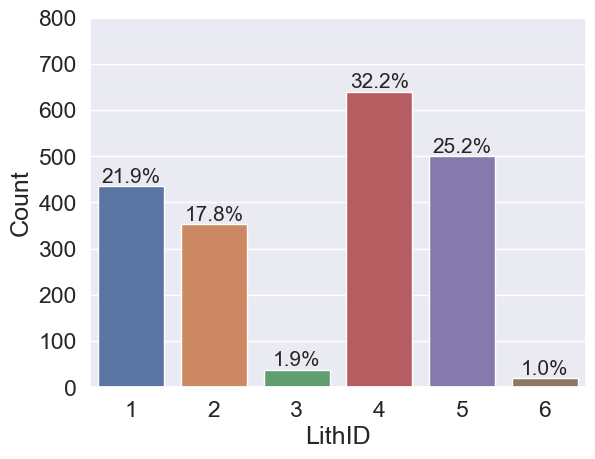

In [439]:
# plt.figure(figsize=(12,8))
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.5)
ax= sns.countplot(x="LithID", data=data)
ax.set(ylabel='Count')
plt.ylim([0, 800])
ncount = len(data)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), size=15,
            ha='center', va='bottom') # set the alignment of the text
plt.savefig('Lithology.png')

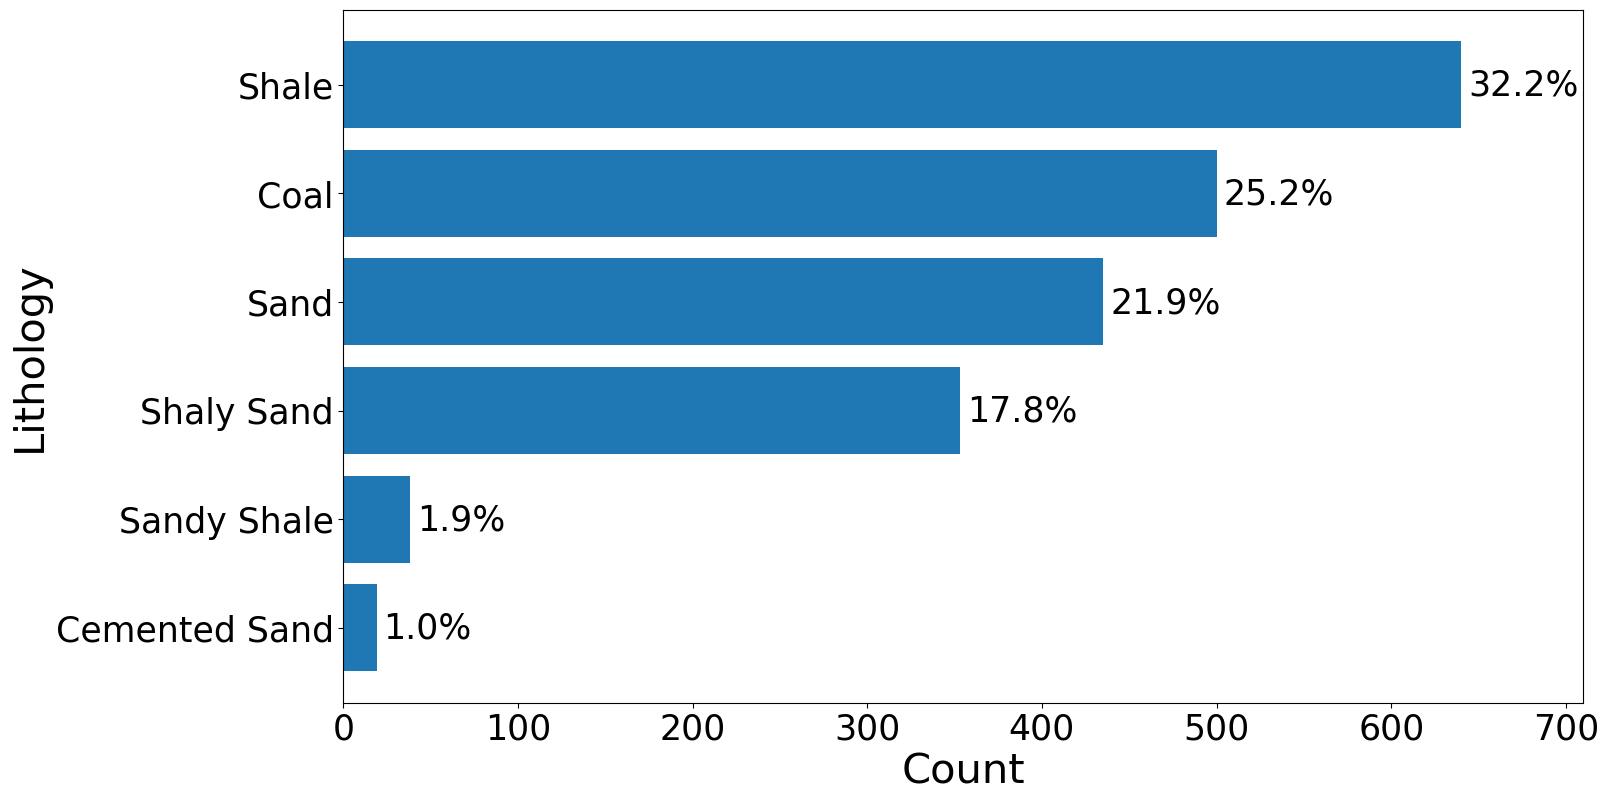

In [440]:
import matplotlib
matplotlib.rc_file_defaults()
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(lithology_count_df.index, lithology_count_df.Count)

ncount = sum(lithology_count_df.Count)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+4, i.get_y()+0.3,
             '{:.1f}%'.format(100.*i.get_width()/ncount),
             fontsize = 25, color ='black')
 
plt.xlabel('Count', fontsize=30,  color ='black')
plt.ylabel('Lithology', fontsize=30,  color ='black')

ax.tick_params(axis='both', which='major', labelsize=20,  color ='black')
ax.tick_params(axis='both', which='minor', labelsize=20,  color ='black')

ax.spines['left'].set_color('black')
ax.spines['top'].set_color('black')

plt.xticks(fontsize=25, color= 'black')
plt.yticks(fontsize=25, color= 'black')

plt.xlim(0, 710)

# Show Plot
plt.show()

In [441]:
ax.patches

In [455]:
data_lithology_merged.describe().to_csv("data_description.csv")

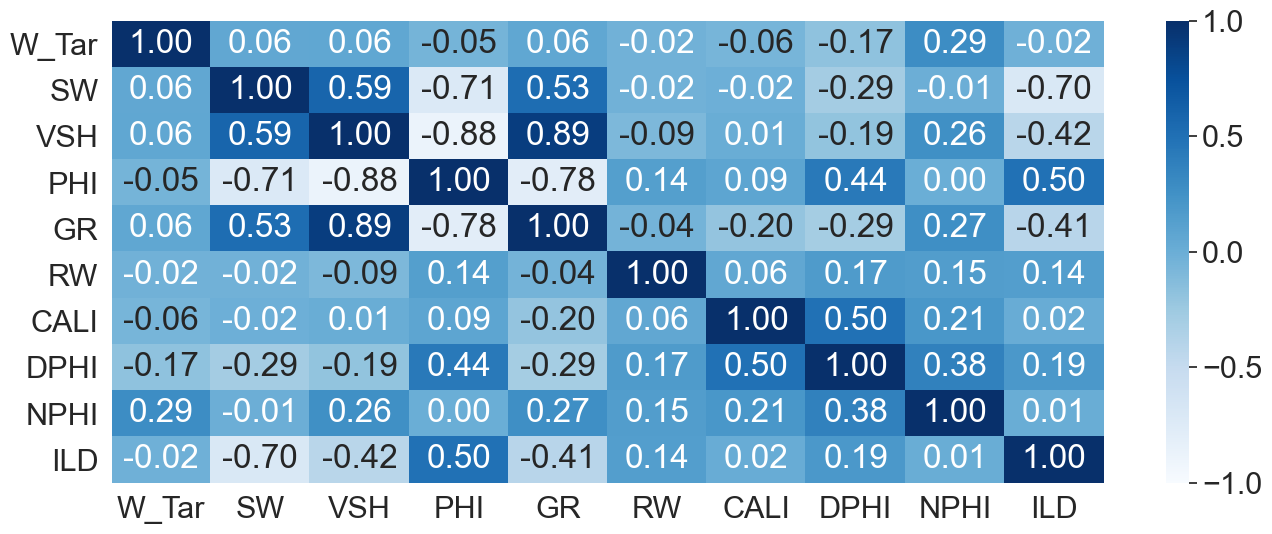

In [453]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data_lithology_merged[['W_Tar', 'SW' , 'VSH', 'PHI', 'GR', 'RW', 'CALI' , 'DPHI' , 'NPHI' ,'ILD']].corr(), vmin=-1, vmax=1, annot=True, cmap= 'Blues', fmt='.2f')
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('CC.png')

C:\Users\engab\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\engab\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


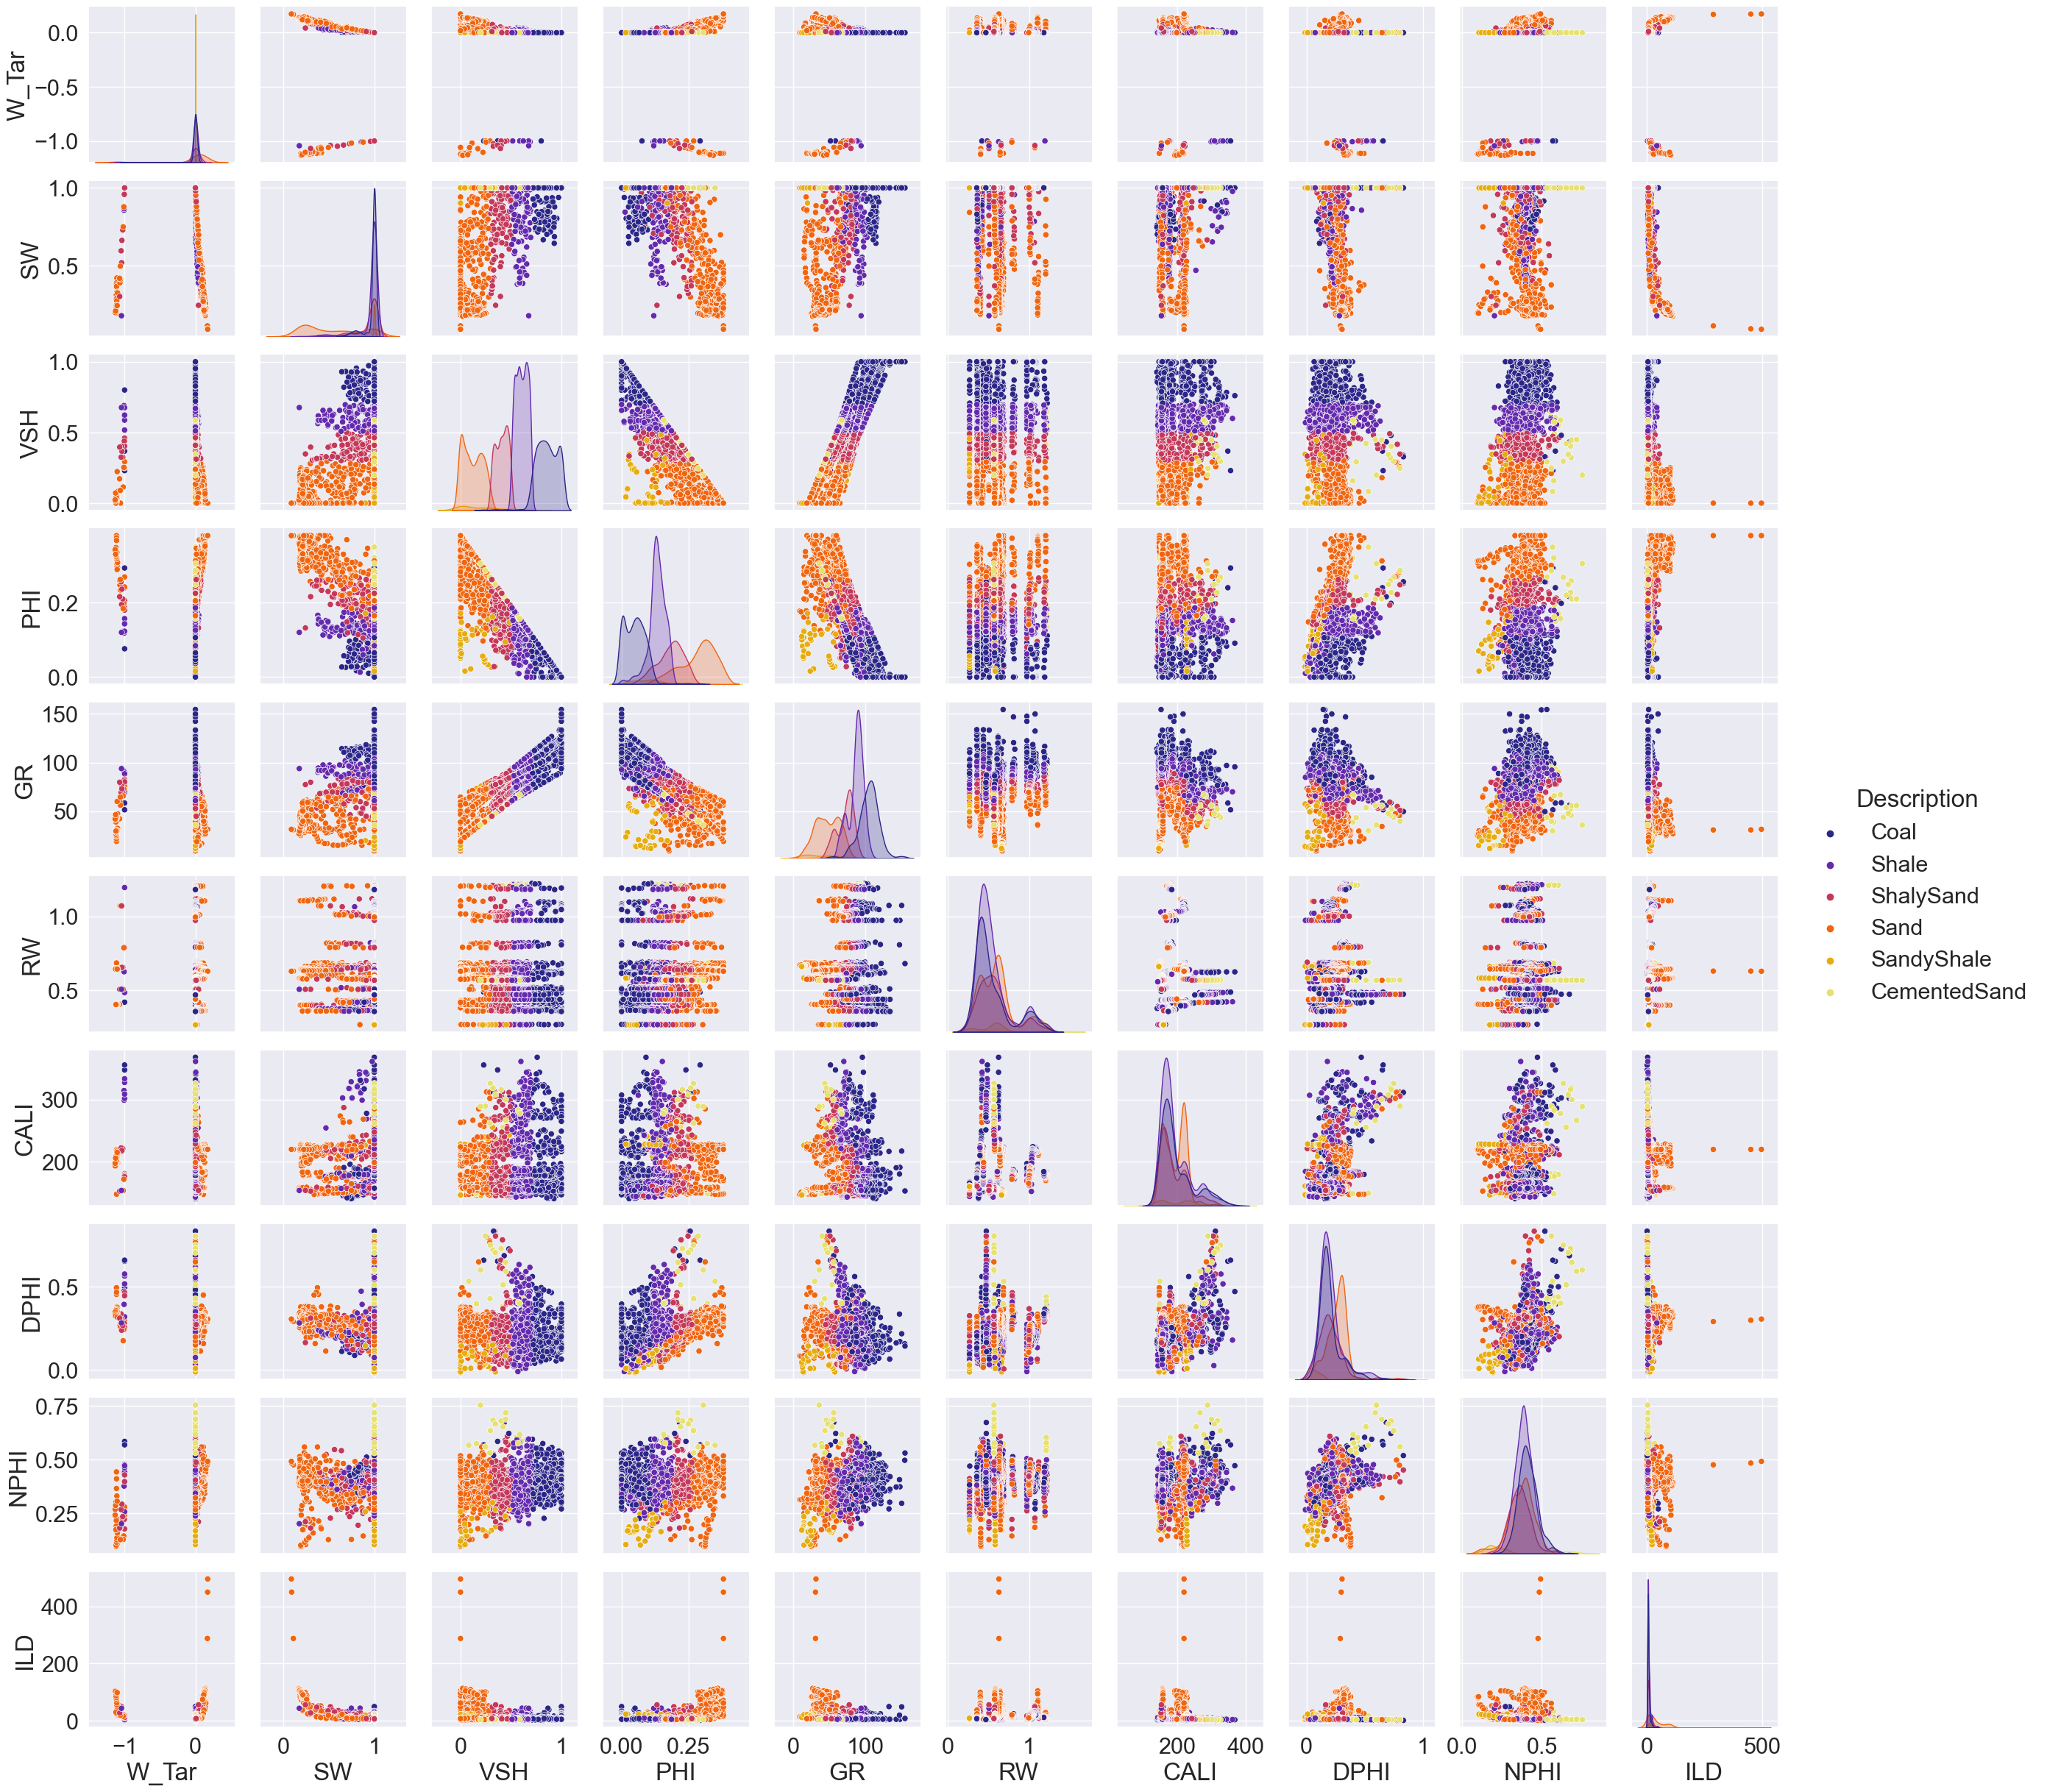

In [449]:
import seaborn as sns
sns.set(font_scale=2)
data.LithID = data_lithology_merged.LithID.astype('category')
sns.pairplot(data_lithology_merged, vars= ['W_Tar', 'SW' , 'VSH', 'PHI', 'GR', 'RW', 'CALI' , 'DPHI' , 'NPHI' ,'ILD'], hue='Description', palette = 'CMRmap')
plt.savefig('pair.png')

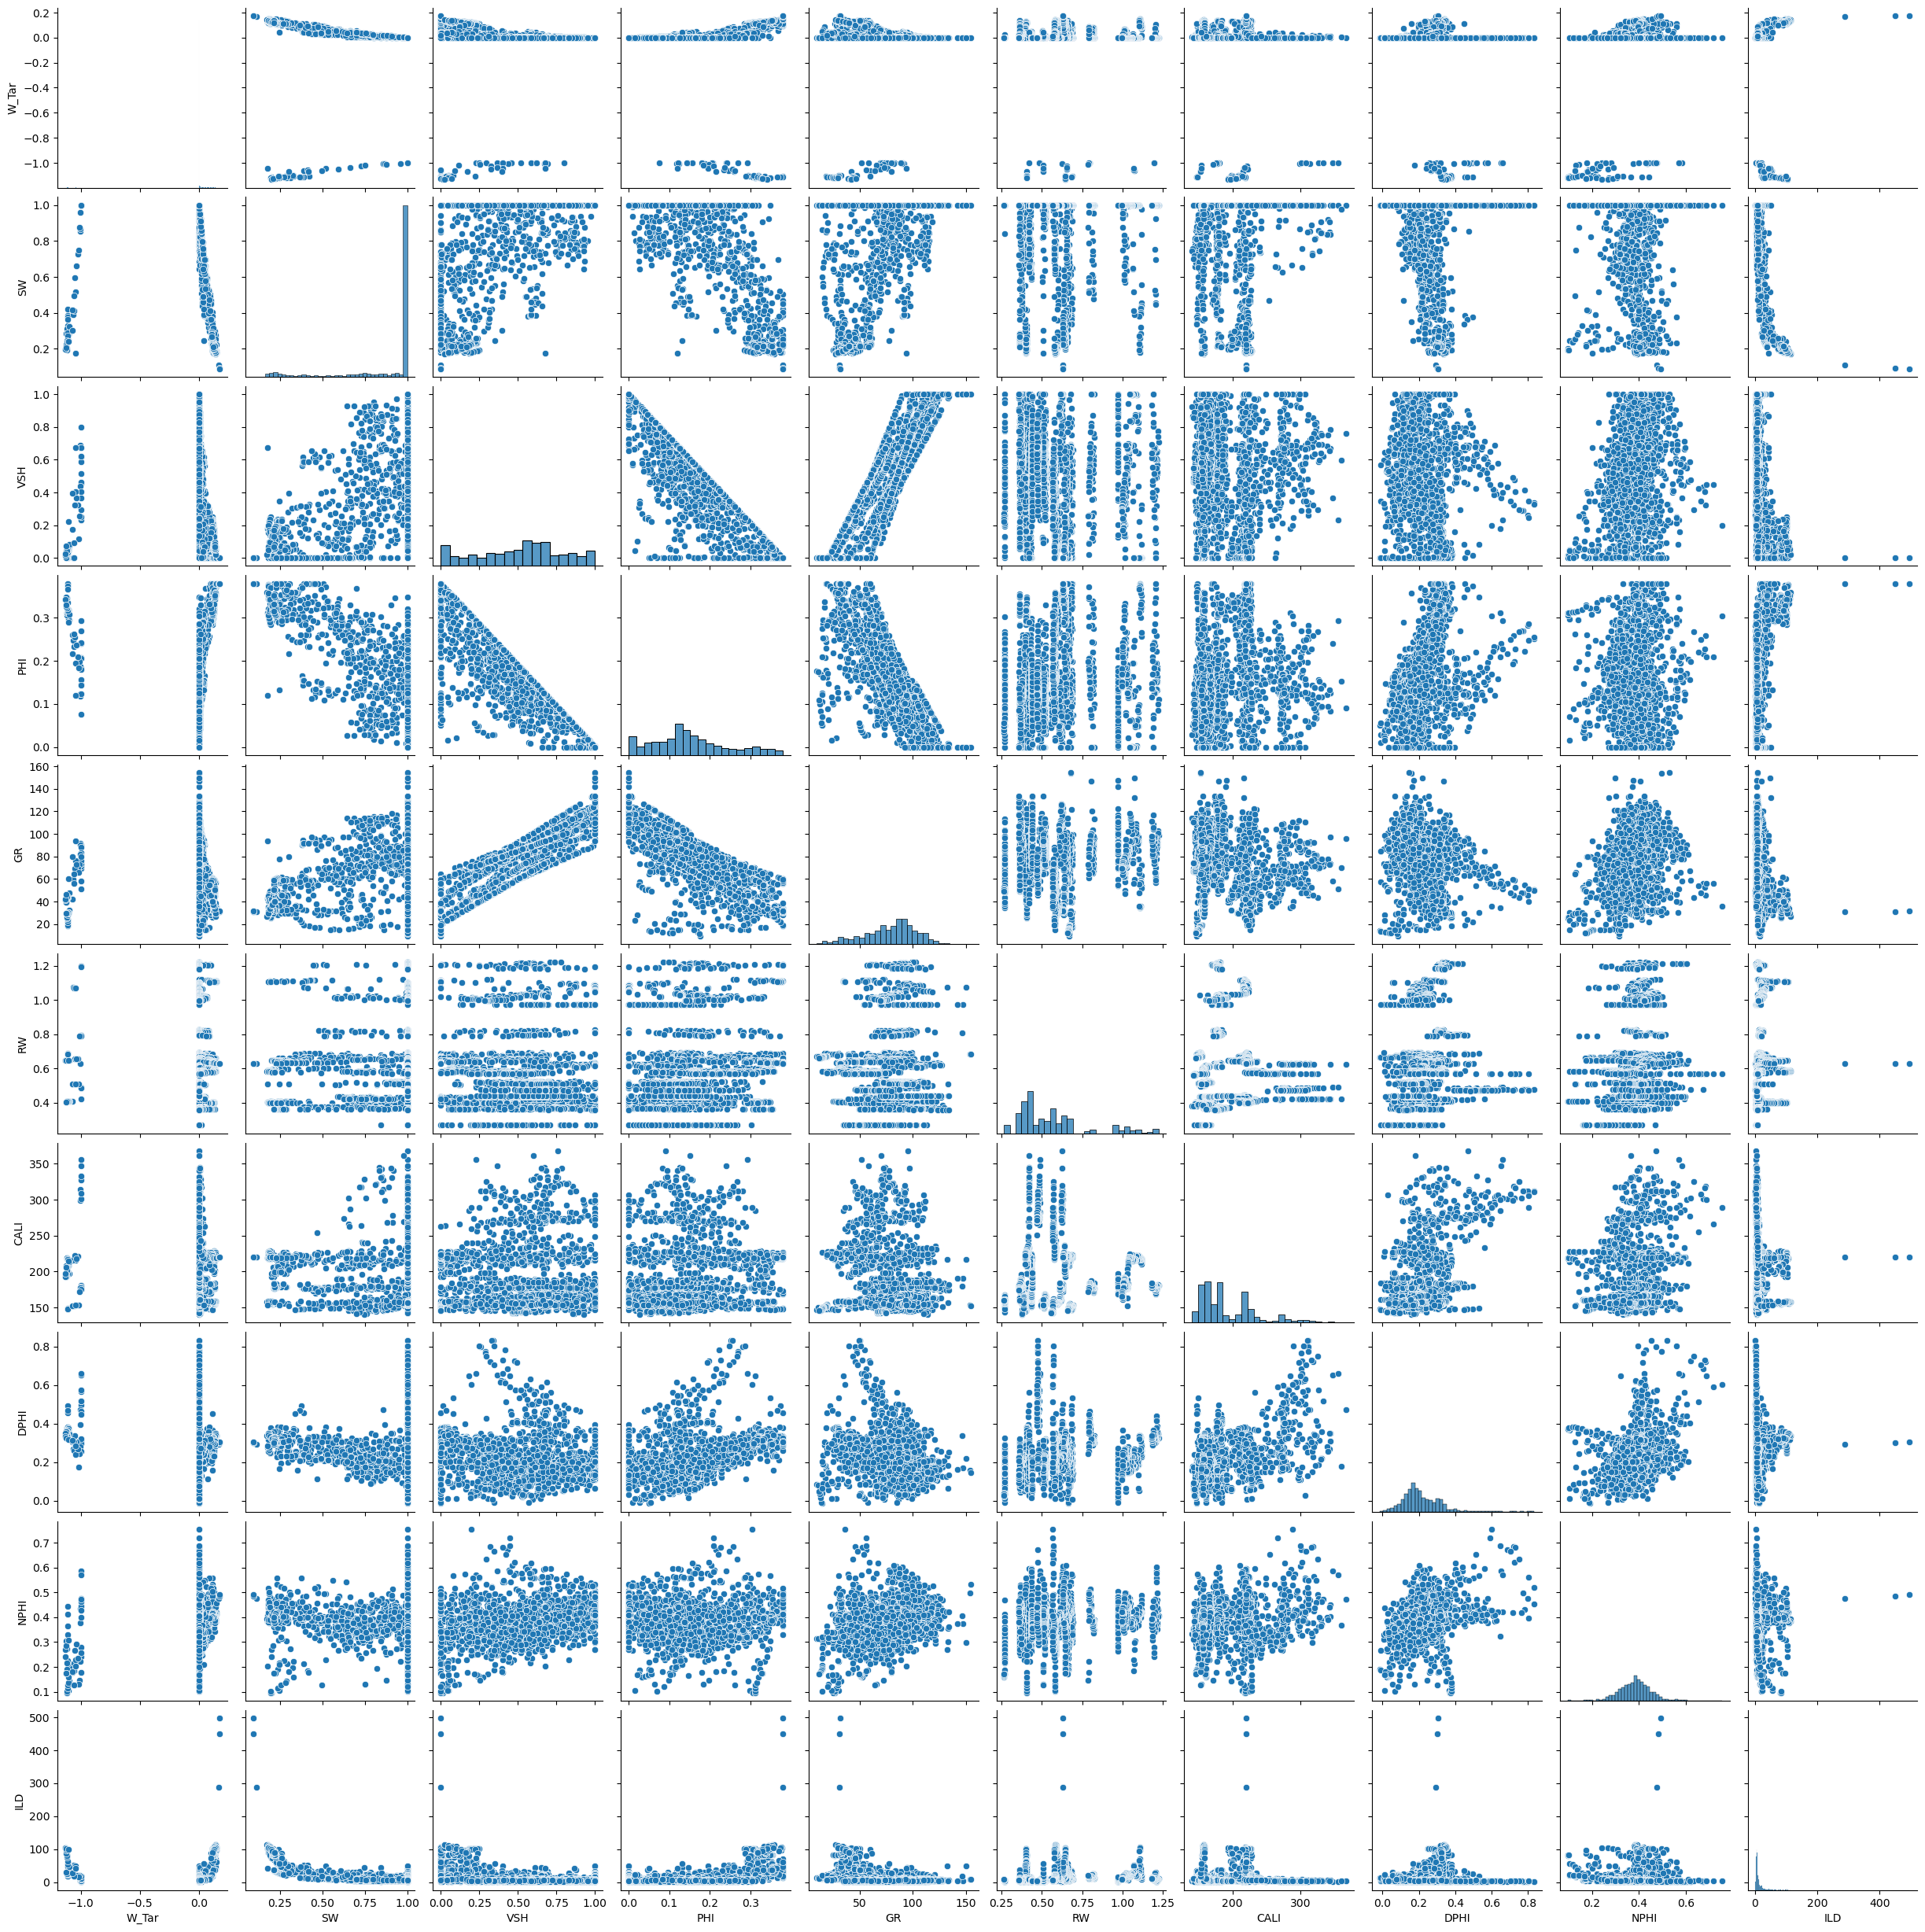

In [445]:
sns.pairplot(data, vars= ['W_Tar', 'SW' , 'VSH', 'PHI', 'GR', 'RW', 'CALI' , 'DPHI' , 'NPHI' ,'ILD'], palette = 'CMRmap')

In [456]:
# the name of the file
file_name = 'CompiledData.xlsx'
  
# saving the excel
data_lithology_merged.to_csv(file_name)

In [447]:
from platform import python_version

print(python_version())

3.8.8


In [448]:
!jupyter --version

jupyter core     : 4.7.1
jupyter-notebook : 6.3.0
qtconsole        : 5.0.3
ipython          : 7.22.0
ipykernel        : 5.3.4
jupyter client   : 6.1.12
jupyter lab      : 3.0.14
nbconvert        : 5.6.1
ipywidgets       : 7.6.3
nbformat         : 5.1.3
traitlets        : 5.0.5
